In [1]:
# Reed Whitcraft
# Full-Time
# Project 1

# King County House Sales Exploration
___


> You can't answer a question that hasn't been asked. - Me

Before we explore the King County House Sales data we have been provided, we have to make that data purposeful, and data cannot answer a question that hasn't been asked. So, the first step is to ask ourselves what problem are we trying to solve.  Establishing this question gives us direction, and directionless data wrangling and exploration is a waste of time (and probably money).

For this project, we'll be following a popular approach in data science called **OSEMN**

## OBTAIN

  - Before we can do anything, we have to first define and find our data. We also have to establish our problem and define our business question.
  
## SCRUB

  - Once we have defined our problem and obtained our data, we must inspect and clean our data.  This step often blends with the following step, as we may find that we need to scrub our data after initial exploration.  Here, we'll be looking for: 
  
        (1) null or missing values
        (2) extreme outliers or impractical/impossible values - sometimes, these are placeholders intentionally put into a dataset to represent missing values
        (3) confirm and/or edit the formats of our datatypes - sometimes, numerical information is incorrectly persisted as strings.
        (4) initial inspection of non-continuous data that may be categorical and need to be properly converted before modeling.
    
## SCRUB/EXPLORE

  - Somwhere in the scrub and explore stages, we will want to confirm that our data is normally distributed and not heavily skewed.  Visualizations will help us determine the shape of our data, and if not normal, our data may have to be transformed for our model.
    
## EXPLORE

  - With our data scrubbed, we can now explore what we've found.  Given a target variable, in this case, price, we will be looking for how our feature variables correlate with price.  We'll often create visualizations, including scatterplots, to see if we can see a, hopefully, linear relationship.  Additionally, we'll have to look out for multicollinearity -- that is, when a change in one feature variable is associated with a change in another feature variable.  This is concerning because the foundation of our modeling process is based upon the fact that, when marginally changing one variable with respect to price, all other variables are held constant.  And, if this is not the case, and other variables change, we may not be able to confidently trust the results and accuracy of our model.

## MODEL

 - Having explored our data and narrowed our feature variables, we will begin the modeling process.  We will split our data into testing and training subsets, and we will see if we can construct a model that accurately predicts housing prices given (testing) data we have withheld from our model (trained by the other subset of data).

## INTERPRET

- After modeling, the final step will be to analyze and interpret our results.  We should find out what feature variables are the most influential and whether or not our initial business decision has been answered.  Here, we can also discuss problems we faced and suggestions for future work.


So what are we concerned with? What question do we have and what are we trying to figure out?

Assuming the role of a home owner looking to sell his/her house, how can I appropriately price my house, so that I may get the highest offer, without letting it sit on the market for too long?  Is there anything I can do to increase the value of my house through renovating? Can I price my house at the same price of a similar house in another neighborhood, or should I keep my comparables restricted to my neighborhood, or similar neighborhoods?  


# Part I: Obtain & Scrub
***

### Obtaining Our Data

With our question established, typically, we would have to find our data, whether it be through publicly available services, web scraping, purchase, or another means. Luckily, in this situation, we are dealing with data that was magically delivered to us.

### Scrubbing Our Data

Given the questionable delivery (and creation?) of our data, we cannot consider exploring our question without first assessing the quality of our data and cleaning subsets that may be incorrectly typecasted, erroneous, empty, or impossible.  So, let's load and preview what we have.

In [2]:
# load initial libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visualizations
%matplotlib inline

In [3]:
data = pd.read_csv("kc_house_data.csv", index_col="id") # load the data

In [4]:
data.head() # preview the data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info() # look at column types, names, and counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


One of the first things to notice is that there are a couple sqft_ features, and all are integer types (which is what we would expect), except sqft_basement which is a string. And if we look are the rows returned in data.head(), we can see that sqft_basement is, indeed, supposed to be an integer.

In [6]:
data.describe() # take a quick look at the ranges, distributions of column values

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.sqft_basement.value_counts() # looking inside sqft_basement

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
225.0         1
2050.0        1
1852.0        1
2580.0        1
2490.0        1
243.0         1
2390.0        1
861.0         1
946.0         1
1275.0        1
1930.0        1
2730.0        1
207.0         1
1008.0        1
274.0         1
266.0         1
65.0          1
1548.0        1
3000.0        1
276.0         1
1245.0        1
556.0         1
295.0         1
935.0         1
1913.0        1
475.0         1
704.0         1
875.0         1
1880.0        1
2850.0        1
Name: sqft_basement, Len

As expected, numbers stored as strings; however, there are some "?" placeholders instead of 0. This '?' might mean that there was no record of the square footage of the basements for these houses but that these houses had basements (thus, purposefully distinguished from 0), or it may mean that this information was not available. Given this, we could either replace these values with an average of our data set, or 0. Given that it's only a small subset of our data (454), it's safe to clean this up. 


In [8]:
questionable_basements = data.loc[data['sqft_basement'] == '?']
num_questionable_basements = len(questionable_basements)
print("number of questionable basements:", num_questionable_basements)

number of questionable basements: 454


In [9]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = 0 # convert ? to 0

In [10]:
data.sqft_basement = data.sqft_basement.astype(np.float64) # change from string

### Handling Null Values

In [11]:
data.isna().sum() # get counts of null values for each column

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

It looks like we have a pretty complete set of data, with most columns having no null values.  Looking at the three columns with missing information (**waterfront, view, & yr_renovated**), my initial thought is that these may be boolean representations of these features, so a zero or empty value in yr_renovated would indicate that a house was not renovated, and a zero or missing value in waterfront would indicate that a house did not have a waterfront view, but these assumptions will have to be confirmed. We have 21,597 rows of housing data, and the missing null values in each of these columns is not a great percent of the overall data, so these columns don't need to be dropped (at the moment).

In [12]:
data.yr_renovated.value_counts() # peeking inside yr_renovated

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Again, looks like the most common value is 0, which should represent that a house was not renovated. Going to change the missing values to this.

In [13]:
data.yr_renovated.fillna(0, inplace=True) # replace null values with 0
data.waterfront.fillna(0, inplace=True) # fill null values in waterfront as well
data.view.fillna(0, inplace=True) # fill null values in view as well as there are only 63 missing

In [14]:
data.isna().sum() # checking columns for null values again

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EXPLORE
***

After some initial cleaning, it's time to explore our data and look for outliers, multicollinearity, categorical variables, the distribution of our features, and their potential relationship with housing prices.

## Looking for Outliers

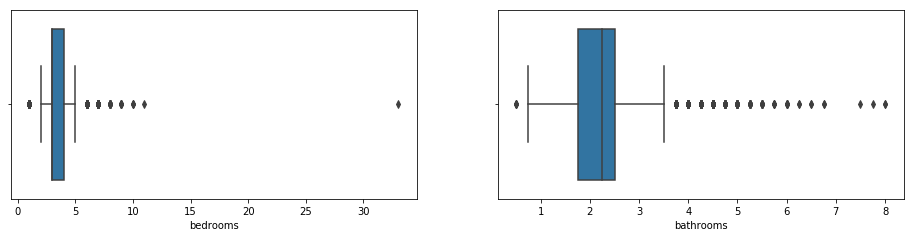

In [16]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='bedrooms', data=data)
plt.subplot(422)
sns.boxplot(x='bathrooms', data=data)

We have at least one significant outlier with over 30 bedrooms, and a couple others well above the 75% threshold that contains the rest of the observations.  Similarly, we have even more bathroom outliers.  These affects the mean and will negatively impact our model, so let's address these outliers here.

In [17]:
data = data[data.bathrooms < 6] # removing outliers
data = data[data.bedrooms < 10]

Taking another look at the boxplots for these:

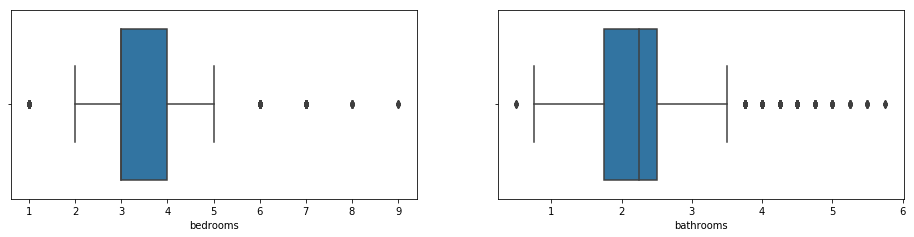

In [18]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='bedrooms', data=data)
plt.subplot(422)
sns.boxplot(x='bathrooms', data=data)

Still more outliers than ideal, so will keep bathrooms < 5 and bedrooms < 7

In [19]:
data = data[data.bathrooms < 5]
data = data[data.bedrooms < 7]

Now let's take a look at square feet:

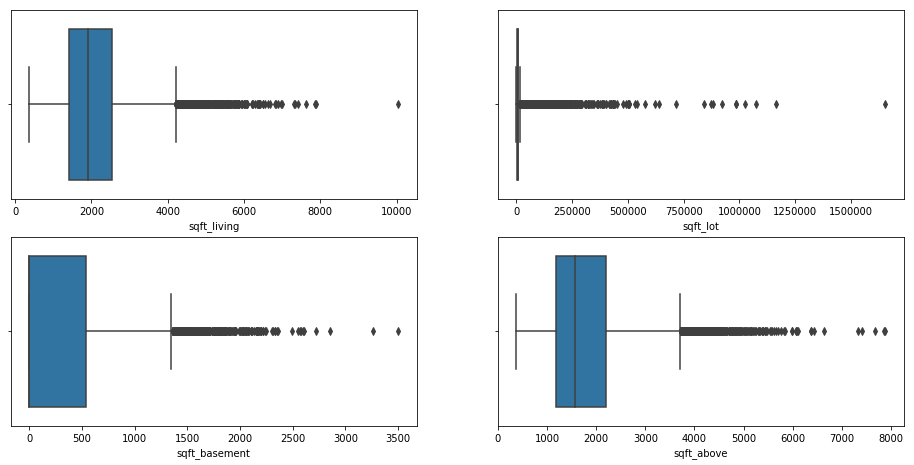

In [20]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='sqft_living', data=data)
plt.subplot(422)
sns.boxplot(x='sqft_lot', data=data)
plt.subplot(423)
sns.boxplot(x='sqft_basement', data=data)
plt.subplot(424)
sns.boxplot(x='sqft_above', data=data)

There are a handful of outliers in the square footage attributes, and we can see, again, that a lot of houses have 0 basement values.  My first thought is to, first, remove some of the outliers on the right, and then potentially remove basement as a feature variable (once we check for its correlation with price and multicollinearity)

In [21]:
data = data[data.sqft_living < 7000] # removing outliers
data = data[data.sqft_lot < 750000]
data = data[data.sqft_above < 5000]

Let's take a look at these again:

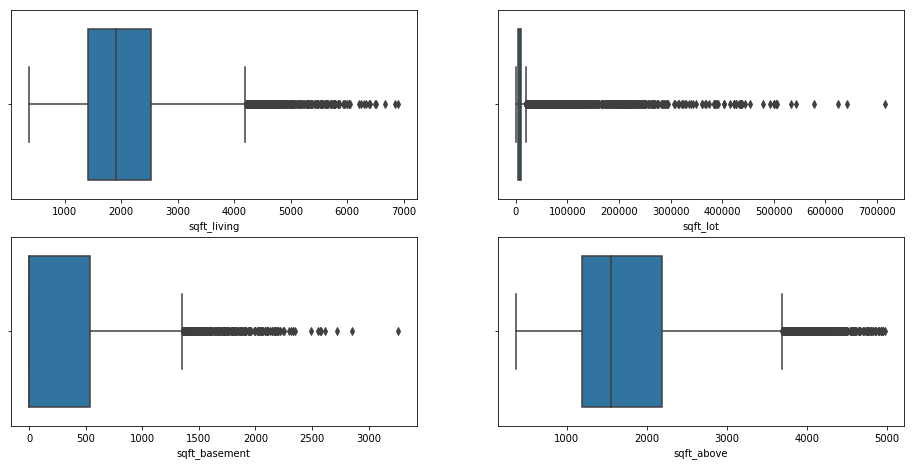

In [22]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='sqft_living', data=data)
plt.subplot(422)
sns.boxplot(x='sqft_lot', data=data)
plt.subplot(423)
sns.boxplot(x='sqft_basement', data=data)
plt.subplot(424)
sns.boxplot(x='sqft_above', data=data)

Square feet lot does not look great, and square feet living looks better, but probably could remove a couple more of the outliers.  

In [23]:
data = data[data.sqft_living < 5500] # removing more outliers

Now let's check price:

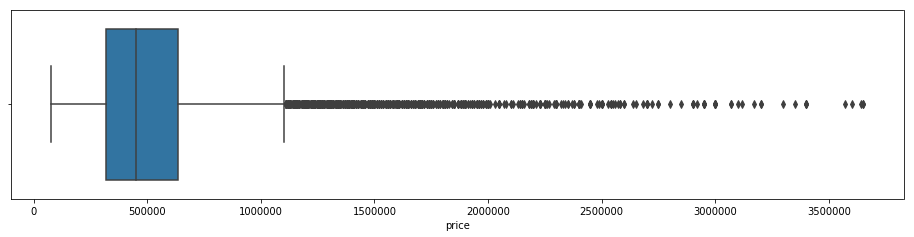

In [24]:
plt.figure(figsize=(16,16))
plt.subplot(411)
sns.boxplot(x='price', data=data)

Price has a handful of ourliers, so let's remove some.

In [25]:
data = data[data.price < 2000000] # removing outliers

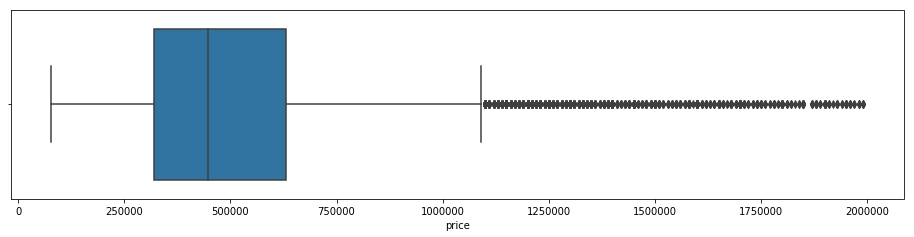

In [26]:
plt.figure(figsize=(16,16))
plt.subplot(411)
sns.boxplot(x='price', data=data)

## Multicollinearity

Now, we are going to look for multicollinearity, which is when one predictor variable can be linearly predicted from others.  Ideally, we want to choose feature variables that are not correlated with each other, since our linear regression model assumes this.  

In [27]:
abs(data.corr()) > 0.75 # looking to see if any variables have a correlation >= 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


We can see that some feature variables show correlation, but we can't tell the significance of this, so let's create a heat map that will color their correlation.

Text(0.5, 1.0, 'Feature Correlation')

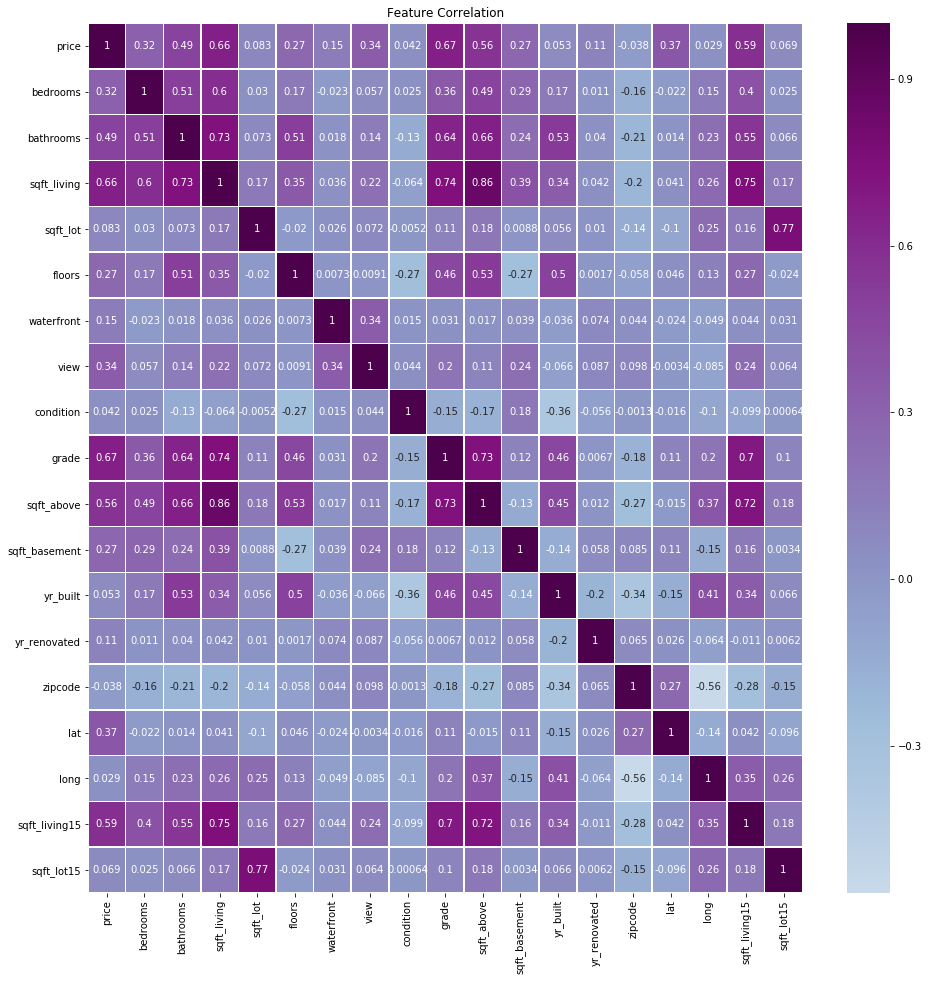

In [28]:
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="BuPu")
plt.title('Feature Correlation')

Here, we are looking for darker values, which translate to features that have higher correlation.  Greater than 0.75 is a sign of multicollinearity. The highest correlation between features is **0.86**, between **sqft_above and sqft_living**. This makes sense because sqft_living includes sqft_above. We can see that the pairs **sqft_lot/sqft_lot15** and **sqft_living/sqft_living15** have high correlation, which, again makes sense.  We'll have to see if we want to remove one of each later on.

For now, let's remove sqft_above.

In [29]:
data.drop('sqft_above', axis=1, inplace=True) # dropping sqft_above

## Scatterplots

Let's take a couple of the remaining variables and plot them against price to get a better sence of their relationship to price.

Text(0.5, 1.0, 'Price vs. Zipcode')

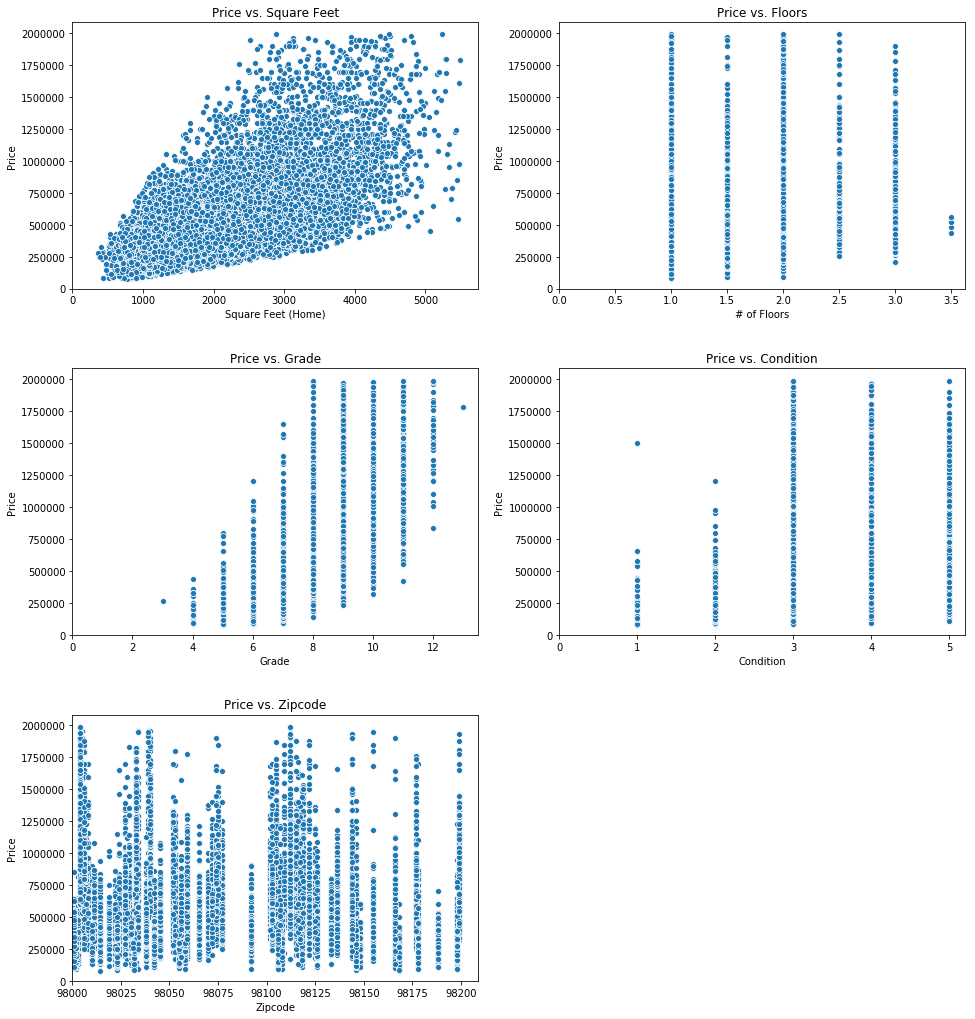

In [30]:
plt.figure(figsize=(16,24))
plt.subplots_adjust(hspace=0.3)
plt.subplot(421)
ax = sns.scatterplot(x="sqft_living", y="price", data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet")
plt.xlabel("Square Feet (Home)")
plt.ylabel("Price")

plt.subplot(422)
sns.scatterplot(x='floors', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("# of Floors")
plt.ylabel("Price")
plt.title("Price vs. Floors")

plt.subplot(423)
sns.scatterplot(x='grade', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price vs. Grade")

plt.subplot(424)
sns.scatterplot(x='condition', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs. Condition")

plt.subplot(425)
sns.scatterplot(x='zipcode', y='price', data=data)
plt.xlim(98000,None)
plt.ylim(0,None)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Price vs. Zipcode")

We can clearly see that there is a positive relationship between square feet and price.
We can also see a positive relationship between condition, grade, floors and price.  We also reconfirm that (grade, condition) are not continuous variables and we may need to change them to be categorical when considering their inclusion into our model.  

We can see that some zipcodes have higher selling prices than others.  This makes sense as location, and neighborhood amenities/features is often considered to be associated with a house's value and desirability.

## Feature Creation

Generally, one can assume that similar houses in a single neighborhood have similar selling prices.  But when compared to similar houses in *different* neighborhoods (like one's that have a higher crime rate, wealthier neighborhoods), they don't really compare.  

Additionally, when buying or selling a house, members of both parties are often interested in price/sqft - as different neighborhoods can have different ranges (like we see in New York City) - and you can compare prices of houses in the same neighborhood.

And, right now, we have all these houses being considered the same way, so instead of trying to map out zipcodes, I am going to:

1. Add a column of **Price/SqFt** to our data.
2. Group houses by zipcode, and find the mean price per square feet for our zipcodes
2. Split zipcodes into three types of "neighborhoods" or "groups" 
  - Zipcodes that have sold below the average price (cheaper areas)
  - Zipcodes that sell above the average price, but not often (don't want to have their values overrepresented)
  - Zipcodes that sell above the average price, and more frequently.  
3. Categorize these groupings as "cheap", "expensive low volume", and "expensive high volume" 
4. With this, I can drop zipcodes from our dataset, and ignore longitude and latitude, as that should also be encapsulated in the zipcode pricing groupings

In [31]:
data['price_per_sqft'] = data['price']/data['sqft_living'] # adding price per sqft

In [32]:
data = data.reset_index() # bring back the id column so we can access it
frequency = data.groupby('zipcode').count()['id'] # group zipcodes, and sum up number of sales
mean = data.groupby('zipcode').mean()['price_per_sqft'] # get mean price/sqft for sales
cluster = pd.concat([frequency, mean], axis=1) # combine these
cluster['zipcode'] = cluster.index
cluster.columns = ['frequency', 'price_per_sqft', 'zipcode']
cluster.describe()

,frequency,price_per_sqft,zipcode
count,70.000000,70.000000,70.000000
mean,303.142857,265.649791,98077.300000
std,142.085225,89.315322,56.622408
min,29.000000,148.780767,98001.000000
25%,201.250000,192.676573,98029.250000
50%,277.500000,249.485592,98067.500000
75%,403.000000,314.146865,98117.750000
max,599.000000,543.765469,98199.000000


Looks like the mean is ~$250/SqFt so we will divide the zipcodes here, then split the higher priced groups by the mean frequency (277), and categorize ones below that as lower volume, and ones above as higher volume.

In [33]:
# creating "cheap" group that sell below mean price/sqft (250)
cluster_cheap = cluster[cluster.price_per_sqft < 250]

# temporary cluster of the houses that sell above mean price/sqft
cluster_temp = cluster[cluster.price_per_sqft >= 250]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 277]

# creating "hhigh volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 277]

Now, let's create a function that we can apply to our data, that will take each house's zipcode, find which cluster it belongs to, then add a new column "zipcode_type" that will act as a category.

In [34]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap.index:
        return 'cheap'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'    

In [35]:
data['zipcode_type'] = data.zipcode.apply(get_zipcode_category)

In [36]:
data.zipcode_type.value_counts() # viewing how our clusters look

cheap                    9724
expensive_high_volume    8911
expensive_low_volume     2585
Name: zipcode_type, dtype: int64

Now let's take a look at square feet vs. price, color-coded by zipcode type

In [37]:
df_graphs = data # saved for visualizations after report

Text(0, 0.5, 'Price')

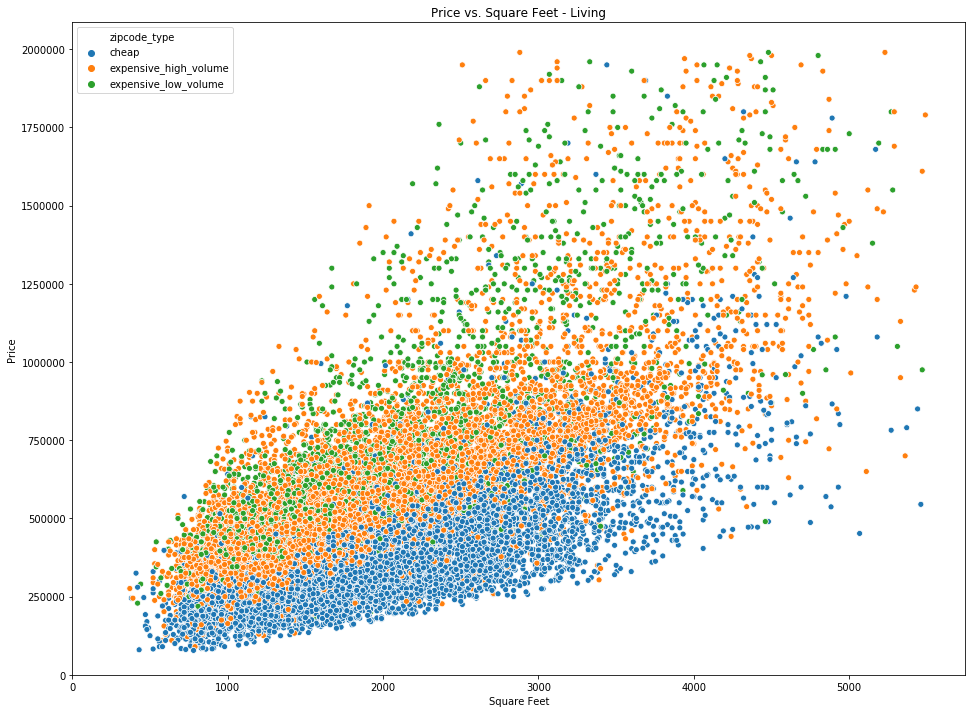

In [38]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="sqft_living", y="price", data=data, hue="zipcode_type")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Living")
plt.xlabel("Square Feet")
plt.ylabel("Price")

Better than expected.  We can see that the different zipcode groups fall into distinct and different price ranges.  We can also see that houses in each group span the full range of square feet options, and the ones in the cheaper zipcodes sell for noticeably less.

We can also see that the low volume, more expensive houses have, generally, higher prices than the high volume, more expensive houses - so it's a good thing we split up our data this way so that the low volume houses don't inflate our price projections unfairly.

## Normalization of Continuous Variables

Before we address our categorical variables, let's first check the distributionso of our continuous variables, then normalize and scale the variables that are imperfect, so that they can work with our model.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


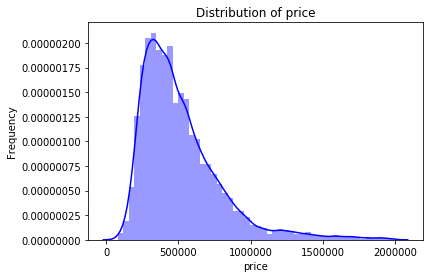

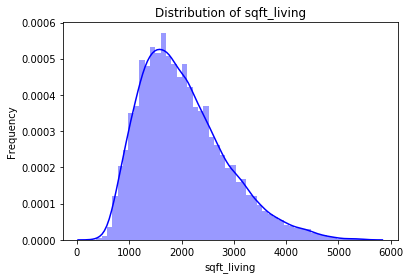

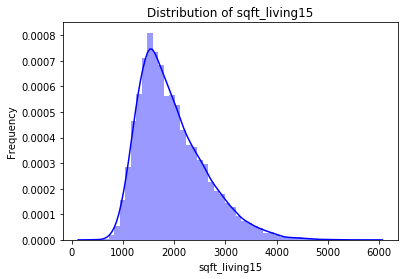

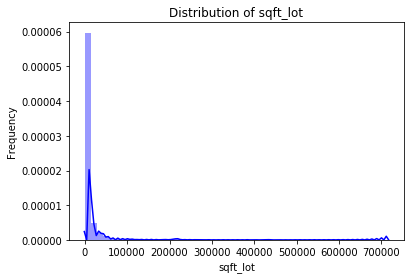

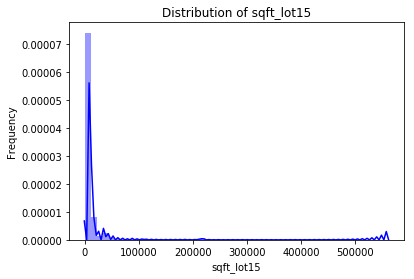

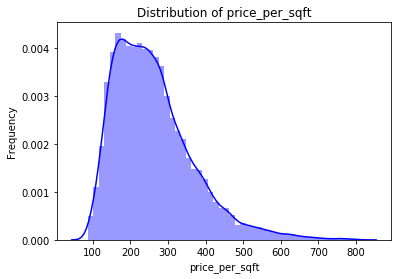

In [39]:
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price_per_sqft']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

Okay, so it looks like a lot of these square foot features are positively skewed, so we will want to normalize them before considering their candidacy in our future model.

Additionally, going to drop sqft_basement from consideration as there are a significant amount of zeros, and we are already working with a couple square feet metrics

In [40]:
data = data.drop(['sqft_basement'], axis=1) # dropping basement

In [41]:
# function that will scale a category that we pass in
def log_transform(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat

In [42]:
# normalizing variables by taking log
# log_price = np.log(data['price'])
log_sq_living = np.log(data['sqft_living'])
log_sq_living15 = np.log(data['sqft_living15'])
log_sq_lot = np.log(data['sqft_lot'])
log_sq_lot15 = np.log(data['sqft_lot15'])
log_ppsq = np.log(data['price_per_sqft'])

# transforming variables so that they are on the same scale
# data['price'] = log_transform(log_price)
data['sqft_living'] = log_transform(log_sq_living)
data['sqft_living15'] = log_transform(log_sq_living15)
data['sqft_lot'] = log_transform(log_sq_lot)
data['sqft_lot15'] = log_transform(log_sq_lot15)
data['price_per_sqft'] = log_transform(log_ppsq)


Let's look at the density plots for these again.

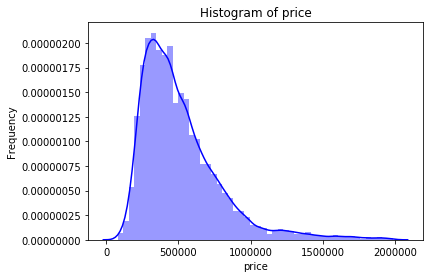

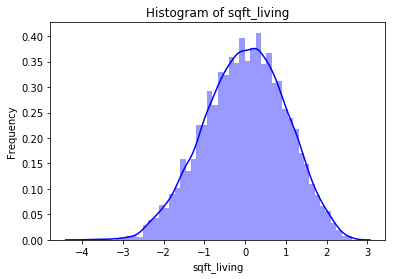

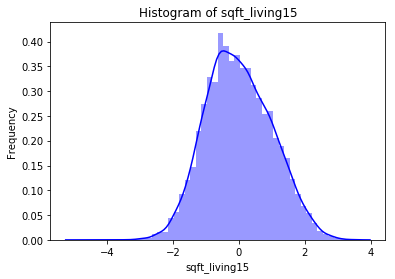

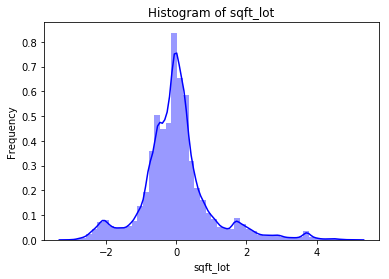

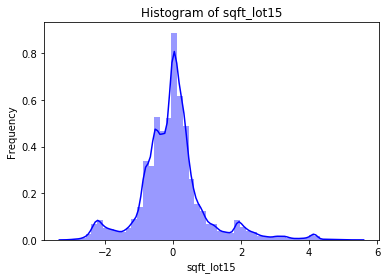

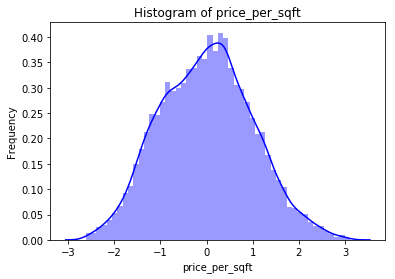

In [43]:
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price_per_sqft']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

These now look more normally distributed, though we see mini-modes for sqft_lot15 and sqft_lot, so we should keep this in mind. 

With our continuous variables now normalized and scaled, our last step in our exploration will be to convert our categorical variables into category types.

## Categorical Variable Transformation

Here are the variables that look like categories.  We'll visualize them with bar charts, then convert them to categories 

- Waterfront (true or false) - categorical
- View
- Condition (non continuous scale) - categorical
- Grade (non continuous scale) - categorical
- Bedrooms/Bathrooms/Floors (non continuous) - categorical
- Zipcode Type


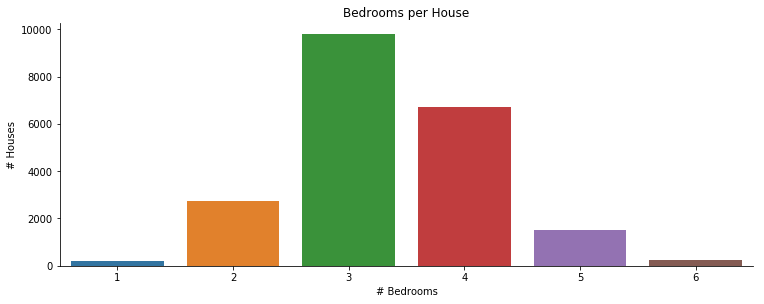

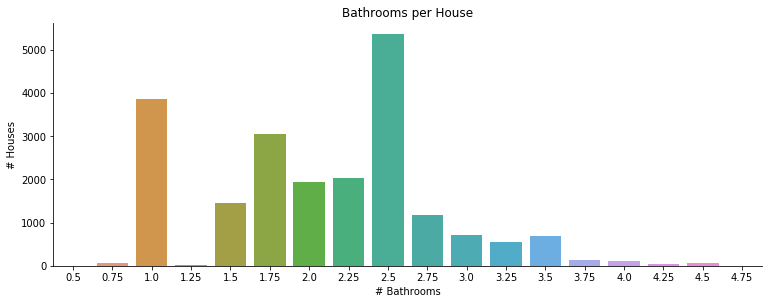

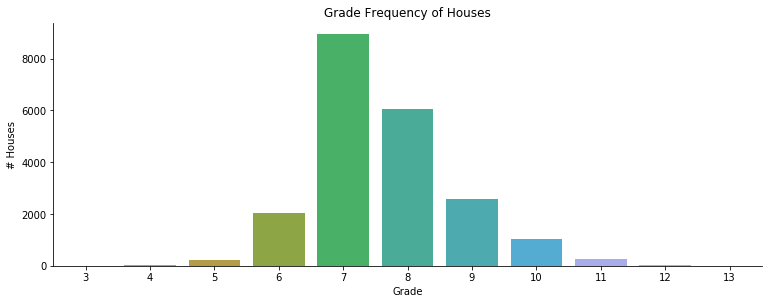

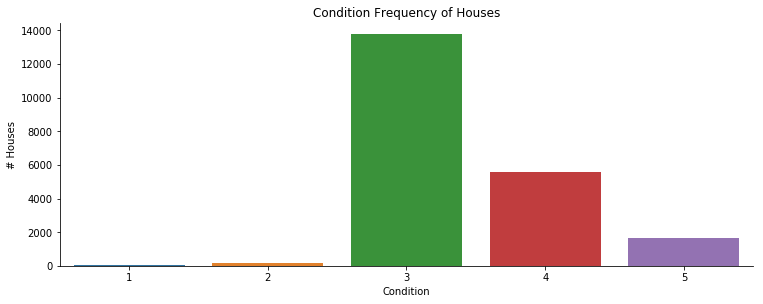

In [44]:
# bedrooms bar chart
sns.catplot(data=data, x='bedrooms', y=None, kind='count')
plt.title("Bedrooms per House")
plt.xlabel("# Bedrooms")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 4)

# bathrooms bar chart
sns.catplot(data=data, x='bathrooms', y=None, kind='count')
plt.title("Bathrooms per House")
plt.xlabel("# Bathrooms")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 4)

# grade bar chart
sns.catplot(data=data, x='grade', y=None, kind='count')
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Grade Frequency of Houses")
plt.xlabel("Grade")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 4)

# condition bar chart
sns.catplot(data=data, x='condition', y=None, kind='count')
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Condition Frequency of Houses")
plt.xlabel("Condition")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 4)

1. Bedrooms
    - Looks fairly normally distributed, with the most common number of bedrooms per house being 3-4. Without the outliers, this looks good.
2. Bathrooms
    - A majority of the bathrooms are between 1.5 and 2.5, with tails on either end. There's a big spike for 1 bathrooms, and this is probably because of apartments and 1-2 bedroom smaller houses might only have 1 bathroom.
3. Grade
    - Relatively normal distribution of housing grades, with the most coommon values around 7-8. Fairly expectable.
4. Condition
    - Majority of houses have the 'average' condition (3), with more houses getting better condition ratings (4,5) than houses scoring below (1,2).

In [45]:
# changing data type to category, then converting

data['bedrooms'] = data['bedrooms'].astype('category')
bedrooms = pd.get_dummies(data['bedrooms'], prefix='br', drop_first=True)

data['bathrooms'] = data['bathrooms'].astype('category')
bathrooms = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)

data['floors'] = data['floors'].astype('category')
floors = pd.get_dummies(data['floors'], prefix='flr', drop_first=True)

data['condition'] = data['condition'].astype('category')
condition = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)

data['grade'] = data['grade'].astype('category')
grade = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

data['waterfront'] = data['waterfront'].astype('category')
waterfront = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)

data['view'] = data['view'].astype('category')
view = pd.get_dummies(data['view'], prefix='vw', drop_first=True)

data['zipcode_type'] = data['zipcode_type'].astype('category')
zip_d = pd.get_dummies(data['zipcode_type'], prefix='zp', drop_first=True)

In [46]:
# adding these new categories to our dataframe
data = pd.concat([data,bedrooms, bathrooms, floors, condition, grade, waterfront, view, zip_d], axis=1)


In [47]:
# dropping the old columns that contained this information.
data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'waterfront', 'view', 'zipcode', 'zipcode_type'], axis=1, inplace=True)

In [48]:
data.describe()

,id,price,sqft_living,sqft_lot,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,...,grd_11,grd_12,grd_13,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,zp_expensive_high_volume,zp_expensive_low_volume
count,2.122000e+04,2.122000e+04,2.122000e+04,2.122000e+04,21220.000000,21220.000000,21220.000000,21220.000000,2.122000e+04,2.122000e+04,...,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000
mean,4.592244e+09,5.140820e+05,1.686507e-13,-3.000528e-14,1970.891989,66.778746,47.559357,-122.214321,3.418448e-13,-5.580443e-14,...,0.012771,0.001744,0.000047,0.004760,0.014656,0.042837,0.021772,0.011357,0.419934,0.121819
std,2.877659e+09,2.790095e+05,1.000024e+00,1.000024e+00,29.302902,358.935301,0.139202,0.140884,1.000024e+00,1.000024e+00,...,0.112287,0.041721,0.006865,0.068828,0.120174,0.202494,0.145941,0.105966,0.493559,0.327084
min,1.000102e+06,7.800000e+04,-3.970909e+00,-3.060820e+00,1900.000000,0.000000,47.155900,-122.519000,-4.819046e+00,-3.071263e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.125059e+09,3.200000e+05,-6.768244e-01,-5.106752e-01,1951.000000,0.000000,47.468575,-122.329000,-7.207689e-01,-5.134202e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.905041e+09,4.480000e+05,3.640426e-02,-4.831372e-02,1975.000000,0.000000,47.570700,-122.231000,-5.710292e-02,-1.746023e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.334500e+09,6.300000e+05,7.183599e-01,3.203440e-01,1996.000000,0.000000,47.678500,-122.125000,6.981009e-01,3.258579e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.900000e+09,1.990000e+06,2.635293e+00,5.072745e+00,2015.000000,2015.000000,47.777600,-121.315000,3.544006e+00,5.332884e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Recently built houses and recently renovated houses can be of much better quality than older houses, so I am going to look at the houses that were built or renovated since 2000, and categorize our housing data along this.

In [49]:
data['renovated_or_newly_built'] = np.where((data.yr_built >= 2000) | (data.yr_renovated >= 2000), 1,0)
df_graphs['renovated_or_newly_built'] = data['renovated_or_newly_built'] # for visualizations

data['renovated_or_newly_built'] = data['renovated_or_newly_built'].astype('category')
renovated_or_newly_built = pd.get_dummies(data['renovated_or_newly_built'], prefix='ren', drop_first=True)



In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21220 entries, 0 to 21219
Data columns (total 61 columns):
id                          21220 non-null int64
date                        21220 non-null object
price                       21220 non-null float64
sqft_living                 21220 non-null float64
sqft_lot                    21220 non-null float64
yr_built                    21220 non-null int64
yr_renovated                21220 non-null float64
lat                         21220 non-null float64
long                        21220 non-null float64
sqft_living15               21220 non-null float64
sqft_lot15                  21220 non-null float64
price_per_sqft              21220 non-null float64
br_2                        21220 non-null uint8
br_3                        21220 non-null uint8
br_4                        21220 non-null uint8
br_5                        21220 non-null uint8
br_6                        21220 non-null uint8
bath_0.75                   21220 non-n

In [51]:
# add newly created category and drop old columns
data = pd.concat([data, renovated_or_newly_built], axis=1)
data.drop(['yr_built', 'yr_renovated', 'renovated_or_newly_built'], axis=1, inplace=True)

We can, now, also drop our latitude and longitude columns since they are essentially encapsulated in our zipcode type.

In [52]:
data = data.drop(['lat', 'long'], axis=1) # encapsulated in zipcode type
# drop id, date
data = data.drop(['id', 'date'], axis=1)

In [53]:
data.info() # let's look again at the remaining feature variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21220 entries, 0 to 21219
Data columns (total 55 columns):
price                       21220 non-null float64
sqft_living                 21220 non-null float64
sqft_lot                    21220 non-null float64
sqft_living15               21220 non-null float64
sqft_lot15                  21220 non-null float64
price_per_sqft              21220 non-null float64
br_2                        21220 non-null uint8
br_3                        21220 non-null uint8
br_4                        21220 non-null uint8
br_5                        21220 non-null uint8
br_6                        21220 non-null uint8
bath_0.75                   21220 non-null uint8
bath_1.0                    21220 non-null uint8
bath_1.25                   21220 non-null uint8
bath_1.5                    21220 non-null uint8
bath_1.75                   21220 non-null uint8
bath_2.0                    21220 non-null uint8
bath_2.25                   21220 non-null uin

# Part IV: MODELING

Now that we have normalized our continuous variables and scaled them, and have converted our categorical variables into something our model can process, I am going to a preliminary look at how well I'm doing thus far, and may return to do some more exploration.

In [54]:
# import linear regression library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

linreg = LinearRegression()

# our feature variables
X = data.drop(['price_per_sqft', 'price'], axis=1)

# our target variable
y = data['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 21020828087.42
Test Mean Squared Error: 18467326619.65
R Squared: 0.737
Mean Absolute Error: 97136.76
Root Mean Squared Error: 135894.54
Average Predicted Price: 506361.53
Average Actual Price: 505905.38
Difference: 456.14


### Initial Interpretation

Our initial model looks pretty accurate, with an R Squared of 0.737, which is a measure of how close the data is to the fitted regression line. A score of 0.737 means that around ~74% of the variability can be explained by our model, but this could have been driven up by the number of features used.  The Root Mean Squared Error of 135,894 is a measure of how far from the regression line data points are (on average), so our model is about 135,000 dollars off of actual house values.

#### Stepwise Selection of features
Using this function (provided), we are going to see what the addition and subtraction of our features do to our model.

In [55]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [56]:
# iterating through our initial feature variables to see if we can remove any with high p-values
result=stepwise_selection(X, y, verbose=True)
print('resulting features:')
print(result)

Add  grd_9                          with p-value 0.0
Add  zp_expensive_low_volume        with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zp_expensive_high_volume       with p-value 0.0
Add  grd_10                         with p-value 0.0
Add  grd_11                         with p-value 0.0
Add  vw_4.0                         with p-value 6.3121e-238
Add  grd_12                         with p-value 1.15199e-161
Add  vw_3.0                         with p-value 5.10581e-84
Add  cd_5                           with p-value 8.19174e-69
Add  sqft_living15                  with p-value 1.14986e-74
Add  bath_2.5                       with p-value 1.28758e-48
Add  grd_8                          with p-value 4.02471e-63
Add  wf_1.0                         with p-value 1.66524e-49
Add  vw_2.0                         with p-value 1.35883e-38
Add  bath_3.75                      with p-value 1.59183e-23
Add  flr_1.5                        with p-value 2.21687e-23
Add  vw_1.

In [57]:
original_features_count = len(X.columns)
stepwise_features = ['sqft_living15', 'zp_expensive_low_volume', 'grd_10', 'sqft_living', 'zp_expensive_high_volume', 'grd_11', 'grd_9', 'vw_4.0', 'grd_12', 'cd_5', 'vw_3.0', 'bath_2.5', 'grd_8', 'wf_1.0', 'vw_2.0', 'bath_3.75', 'flr_1.5', 'vw_1.0', 'cd_4', 'bath_1.0', 'bath_3.25', 'grd_13', 'bath_3.5', 'bath_4.0', 'flr_2.5', 'ren_1', 'sqft_lot', 'sqft_lot15', 'bath_4.5', 'bath_4.25', 'br_2', 'grd_6', 'bath_4.75', 'bath_3.0']
stepwise_features_count = len(stepwise_features)
print("Original # of Feature Variables: ", original_features_count)
print("Selected # of Feature Variables: ", stepwise_features_count)
print("# of Feature Variables Removed: ", original_features_count - stepwise_features_count)

Original # of Feature Variables:  53
Selected # of Feature Variables:  34
# of Feature Variables Removed:  19


## Updated Model

Let's do the same thing we did before, but only with the selected features:

In [58]:
X_new = X[stepwise_features]

In [59]:
linreg = LinearRegression()

# our feature variables
X_new = X[stepwise_features]

# our target variable
y = data['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X_new,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 21068364374.01
Test Mean Squared Error: 18476939233.65
R Squared: 0.736
Mean Absolute Error: 97162.01
Root Mean Squared Error: 135929.91
Average Predicted Price: 506256.66
Average Actual Price: 505905.38
Difference: 351.27


### Model 1 Results:


- Train Mean Squared Error: 21020828087.42
- Test Mean Squared Error: 18467326619.65
- R Squared: 0.737
- Mean Absolute Error: 97136.76
- Root Mean Squared Error: 135894.54
- Average Predicted Price: 506361.53
- Average Actual Price: 505905.38
- Difference: 456.14


### Model 2 Results:

- Train Mean Squared Error: 21068364374.01
- Test Mean Squared Error: 18476939233.65
- R Squared: 0.736
- Mean Absolute Error: 97162.01
- Root Mean Squared Error: 135929.91
- Average Predicted Price: 506256.66
- Average Actual Price: 505905.38
- Difference: 351.27

After dropping 19 variables, we maintained the same R squared value, our mean absolute error dropped marginally, as did our average predicted price.  Our model is slightly better off.

### Interpretation of Revised Model

Our model looks pretty accurate, with an R Squared of 0.736, which is a measure of how close the data is to the fitted regression line. A score of 0.736 means that around ~74% of the variability can be explained by our model, but this could have been driven up by the number of features used.  The Root Mean Squared Error of 135,929 is a measure of how far from the regression line data points are (on average), so our model is about 136,000 off of actual house values. Not much has changed here.

Our average predicted price got a little closer to the average actual price, with fewer features.

Let's check out the list of features we used:

In [60]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21220 entries, 0 to 21219
Data columns (total 34 columns):
sqft_living15               21220 non-null float64
zp_expensive_low_volume     21220 non-null uint8
grd_10                      21220 non-null uint8
sqft_living                 21220 non-null float64
zp_expensive_high_volume    21220 non-null uint8
grd_11                      21220 non-null uint8
grd_9                       21220 non-null uint8
vw_4.0                      21220 non-null uint8
grd_12                      21220 non-null uint8
cd_5                        21220 non-null uint8
vw_3.0                      21220 non-null uint8
bath_2.5                    21220 non-null uint8
grd_8                       21220 non-null uint8
wf_1.0                      21220 non-null uint8
vw_2.0                      21220 non-null uint8
bath_3.75                   21220 non-null uint8
flr_1.5                     21220 non-null uint8
vw_1.0                      21220 non-null uint8
cd_4 

So, for the continuous variables, we used:
    - Square Feet Living
    - Square Feet Living (15)
    - Square Feet Lot
    - Square Feet Lot (15)

And for the categorical variables, we used:
    - Grade
    - View
    - Zipcode Type
    - Floors
    - Bedrooms
    - Bathrooms
    - Condition
    - Waterfront
    - Recently Renovated/Built

### Cross Validation

In [61]:
# import necessary library
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# cross validation score of negative mean squared error
neg_mse_score = cross_val_score(linreg, X_new, y, cv=15, scoring='neg_mean_squared_error')
print("Cross Validation Score (Negative Mean Square Error)")
print(neg_mse_score)
print("*_*_*_*_*_*_*_*_")

# cross validation score of r squared
r2_score = cross_val_score(linreg, X_new, y, cv=15, scoring="r2")
r2_score_print = round(sum(r2_score)/len(r2_score),2)*100
print("Cross Validation Score (R Squared)")
print(r2_score)
print("*_*_*_*_*_*_*_*_")
print('Model Accuracy')
print(r2_score_print)

Cross Validation Score (Negative Mean Square Error)
[-1.76192445e+10 -2.08808996e+10 -2.02703130e+10 -2.21341110e+10
 -1.87650727e+10 -2.19046368e+10 -2.03578450e+10 -1.92236864e+10
 -2.15402466e+10 -2.12995234e+10 -2.21406992e+10 -2.16128005e+10
 -2.12788604e+10 -2.25106505e+10 -2.02694418e+10]
*_*_*_*_*_*_*_*_
Cross Validation Score (R Squared)
[0.73526482 0.73852662 0.74156748 0.71000514 0.74701518 0.71913208
 0.72750825 0.7230869  0.74240003 0.717592   0.73673732 0.73402564
 0.71657318 0.73383411 0.75324263]
*_*_*_*_*_*_*_*_
Model Accuracy
73.0


In [62]:
# check the output from Ordinary Least Squares Regression Results
import statsmodels.api as sm
XX = sm.add_constant(X_new)
model = sm.OLS(y, XX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1739.
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:38:32   Log-Likelihood:            -2.8205e+05
No. Observations:               21220   AIC:                         5.642e+05
Df Residuals:                   21185   BIC:                         5.644e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.037e+05   2484.661    122.233      0.000    2.99e+05    3.09e+05
sqft_living15             2.671e+04   1626.988     16.420      0.000    2.35e+04    2.99e+04
zp_expensive_low_volume    2.86e+05   3409.072     83.901      0.000    2.79e+05    2.93e+05
grd_10                     2.89e+05   5852.650     49.377      0.000    2.78e+05       3e+05
sqft_living               8.256e+04   1958.916     42.144      0.000    7.87e+04    8.64e+04
zp_expensive_high_volume  1.972e+05   2286.310     86.268      0.000    1.93e+05    2.02e+05
grd_11                    4.383e+05   9949.460     44.052      0.000    4.19e+05    4.58e+05
grd_9                     1.662e+05   4112.823     40.398      0.000    1.58e+05    1.74e+05
vw_4.0                    2.292e+05   1.11e+04     20.650      0.000    2.07e+05    2.51e+05
grd_12                    6.418e+05   2.44e+04     26.326      0.000    5.94e+05     6.9e+05
cd_5                      8.468e+04   3890.675     21.764      0.000    7.71e+04    9.23e+04
vw_3.0                     1.22e+05   6892.384     17.706      0.000    1.09e+05    1.36e+05
bath_2.5                 -2.036e+04   2787.414     -7.305      0.000   -2.58e+04   -1.49e+04
grd_8                     4.741e+04   2746.593     17.260      0.000     4.2e+04    5.28e+04
wf_1.0                    2.513e+05    1.7e+04     14.825      0.000    2.18e+05    2.85e+05
vw_2.0                    6.577e+04   4964.548     13.248      0.000     5.6e+04    7.55e+04
bath_3.75                 1.549e+05    1.3e+04     11.893      0.000    1.29e+05     1.8e+05
flr_1.5                   3.688e+04   3609.142     10.218      0.000    2.98e+04     4.4e+04
vw_1.0                     8.15e+04   8272.502      9.852      0.000    6.53e+04    9.77e+04
cd_4                      2.904e+04   2465.532     11.777      0.000    2.42e+04    3.39e+04
bath_1.0                   2.61e+04   3430.868      7.609      0.000    1.94e+04    3.28e+04
bath_3.25                 6.477e+04   6778.789      9.555      0.000    5.15e+04    7.81e+04
grd_13                    1.105e+06   1.44e+05      7.689      0.000    8.23e+05    1.39e+06
bath_3.5                  5.008e+04   6299.871      7.950      0.000    3.77e+04    6.24e+04
bath_4.0                  9.361e+04   1.48e+04      6.345      0.000    6.47e+04    1.23e+05
flr_2.5                    6.79e+04   1.23e+04      5.521      0.000    4.38e+04     9.2e+04
ren_1                     1.627e+04   3045.533      5.342      0.000    1.03e+04    2.22e+04
sqft_lot                   1.95e+04   2602.127      7.492      0.000    1.44e+04    2.46e+04
sqft_lot15               -1.413e+04   2563.803     -5.510      0.000   -1.92e+04   -9102.558
bath_4.5                  9.147e+04   1.77e+04      5.165      0.000    5.68e+04    1.26e+05
bath_4.25     

## Looking Back

Given the high Jarque-Bera, skewness, and kurtosis levels, I would want to go back and further scrub our initial data, removing more outliers.

Additionally, we dropped year renovated, which may change the accuracy of our model.

***
***
***
***
***
***
***
***
***
***
***


# Non-Technical Visualizations Prep

***
***
***
***



Text(0, 0.5, 'Price')

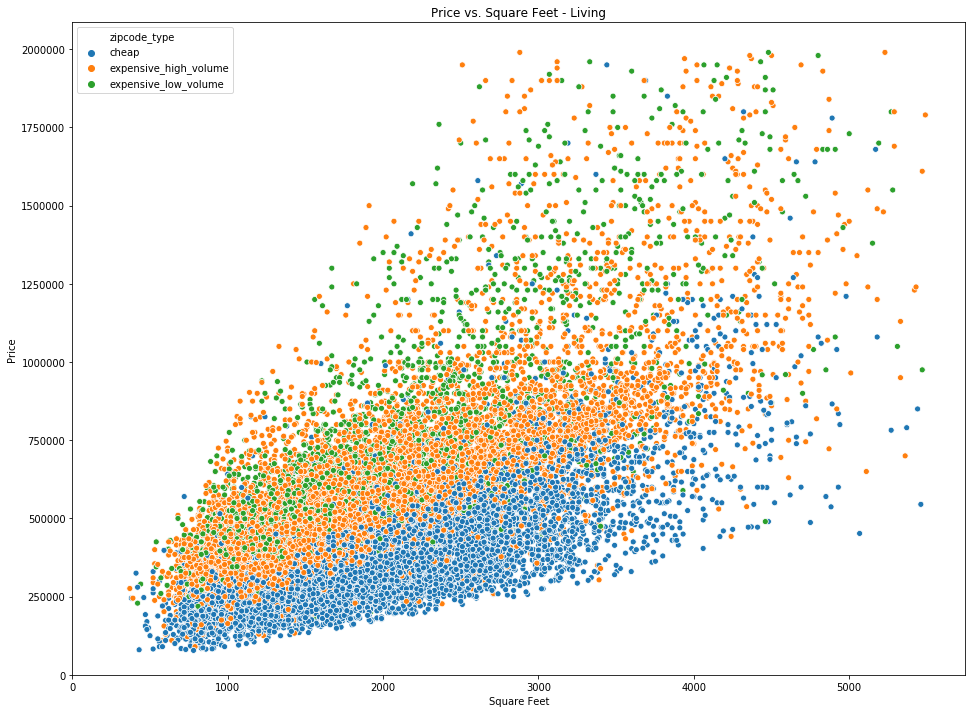

In [63]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="sqft_living", y="price", data=df_graphs, hue="zipcode_type")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Living")
plt.xlabel("Square Feet")
plt.ylabel("Price")

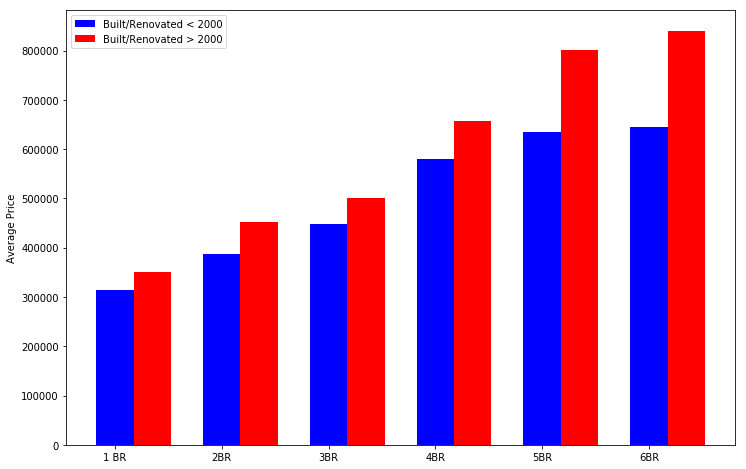

In [160]:
brs = [1,2,3,4,5,6]
brs = ['1 BR', '2BR', '3BR', '4BR', '5BR', '6BR']
typ = ['Built/Renovated < 2000', 'Built/Renovated > 2000']
pos = np.arange(len(brs))
barw = 0.35
new = df_graphs.loc[df_graphs.renovated_or_newly_built == 1]
old = df_graphs.loc[df_graphs.renovated_or_newly_built == 0]
new_brs = new.groupby(['bedrooms'])['price'].mean()
old_brs = old.groupby(['bedrooms'])['price'].mean()
fig = plt.figure(figsize=(12,8))
plt.bar(pos, old_brs, barw, color='blue')
plt.bar(pos+barw, new_brs, barw, color='red')
plt.xticks(pos, brs)
plt.legend(typ, loc=2)
plt.ylabel("Average Price")
plt.show()

In [142]:
df_graphs.price.describe()

def get_price_category(price):
    q1 = 320000.0
    q3 = 630000.0
    if price <= q1:
        return "Bottom 25%"
    elif price >= q3:
        return "Top 25%"
    else:
        return "Middle 50%"

df_graphs['price_quartile'] = df_graphs.price.apply(get_price_category)

Text(0, 0.5, 'Longitude')

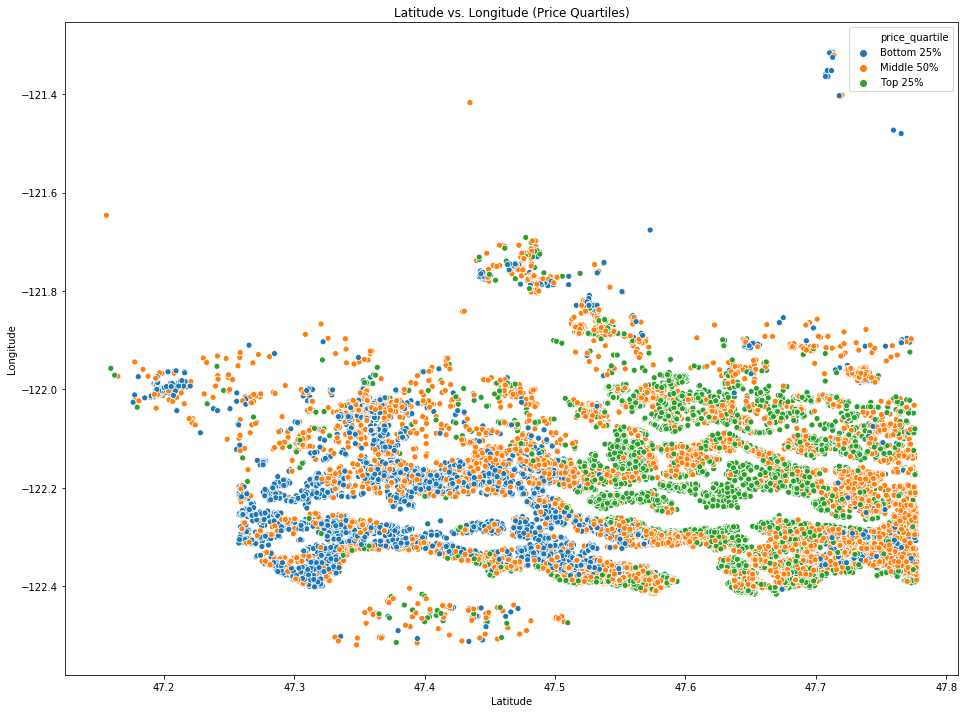

In [159]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="lat", y="long", data=df_graphs, hue="price_quartile")
plt.title("Latitude vs. Longitude (Price Quartiles)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

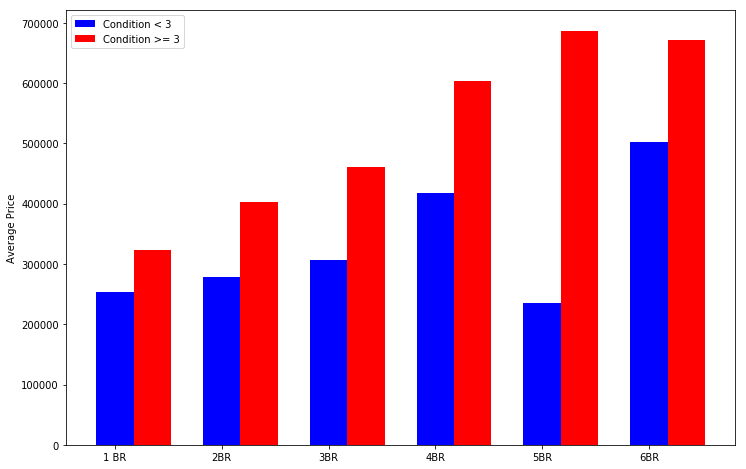

In [158]:
brs = [1,2,3,4,5,6]
brs = ['1 BR', '2BR', '3BR', '4BR', '5BR', '6BR']
typ = ['Condition < 3', 'Condition >= 3']
pos = np.arange(len(brs))
barw = 0.35
new = df_graphs.loc[df_graphs.condition >= 3]
old = df_graphs.loc[df_graphs.condition < 3]
new_brs = new.groupby(['bedrooms'])['price'].mean()
old_brs = old.groupby(['bedrooms'])['price'].mean()
fig = plt.figure(figsize=(12,8))
plt.bar(pos, old_brs, barw, color='blue')
plt.bar(pos+barw, new_brs, barw, color='red')
plt.xticks(pos, brs)
plt.legend(typ, loc=2)
plt.ylabel("Average Price")
plt.show()

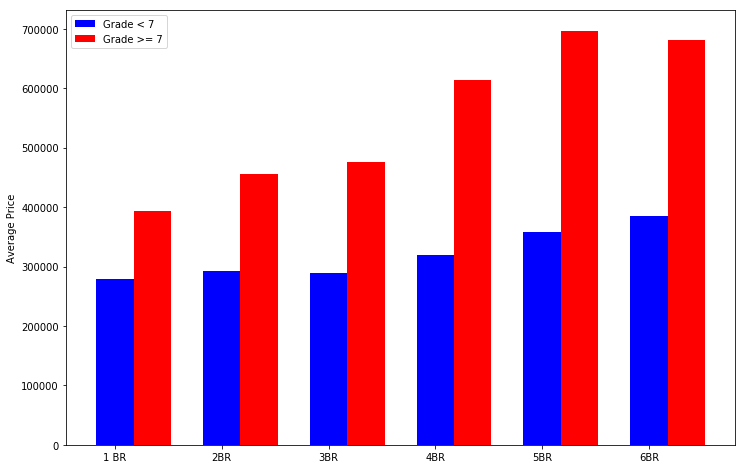

In [157]:
brs = [1,2,3,4,5,6]
brs = ['1 BR', '2BR', '3BR', '4BR', '5BR', '6BR']
typ = ['Grade < 7', 'Grade >= 7']
pos = np.arange(len(brs))
barw = 0.35
new = df_graphs.loc[df_graphs.grade >= 7]
old = df_graphs.loc[df_graphs.grade < 7]
new_brs = new.groupby(['bedrooms'])['price'].mean()
old_brs = old.groupby(['bedrooms'])['price'].mean()
fig = plt.figure(figsize=(12,8))
plt.bar(pos, old_brs, barw, color='blue')
plt.bar(pos+barw, new_brs, barw, color='red')
plt.xticks(pos, brs)
plt.legend(typ, loc=2)
plt.ylabel("Average Price")
plt.show()